<a href="https://colab.research.google.com/github/MrCogito/Spectrogram-Generator/blob/main/Data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Generate spectrogram**

In [1]:
!pip install tensorflow-io

     |████████████████████████████████| 22.7 MB 1.6 MB/s 
     |████████████████████████████████| 2.1 MB 43.9 MB/s 


In [2]:
import tensorflow as tf
import tensorflow_io as tfio
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras 
import pathlib
import os

from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [3]:
!unzip /content/gdrive/MyDrive/Inzynierka/en.zip > /dev/null

Streaming output truncated to the last 5000 lines.
  inflating: en/clips/common_voice_en_22575775.mp3  
  inflating: en/clips/common_voice_en_22575776.mp3  
  inflating: en/clips/common_voice_en_22575777.mp3  
  inflating: en/clips/common_voice_en_22575778.mp3  
  inflating: en/clips/common_voice_en_22575832.mp3  
  inflating: en/clips/common_voice_en_22575833.mp3  
  inflating: en/clips/common_voice_en_22575834.mp3  
  inflating: en/clips/common_voice_en_22575836.mp3  
  inflating: en/clips/common_voice_en_22575841.mp3  
  inflating: en/clips/common_voice_en_22576110.mp3  
  inflating: en/clips/common_voice_en_22576111.mp3  
  inflating: en/clips/common_voice_en_22576112.mp3  
  inflating: en/clips/common_voice_en_22576113.mp3  
  inflating: en/clips/common_voice_en_22576114.mp3  
  inflating: en/clips/common_voice_en_22576115.mp3  
  inflating: en/clips/common_voice_en_22576116.mp3  
  inflating: en/clips/common_voice_en_22576117.mp3  
  inflating: en/clips/common_voice_en_22576118.m

In [27]:
audio_folder = '/content/en/clips/'
spectrogram_folder = '/content/gdrive/MyDrive/Inzynierka/Data/en_spectrogram/'

In [28]:
def audio_to_spectrogram(filename):
  audio = tfio.audio.AudioIOTensor(audio_folder + filename)
  audio_tensor = tf.squeeze(audio[:], axis=[-1])
  tensor = tf.cast(audio_tensor, tf.float32) / 32768.0  # change tensor to float
  spectrogram = tfio.audio.spectrogram(tensor, nfft=512, window=512, stride=512) 
  return spectrogram

In [29]:
import time 

In [30]:
start = time.time()
for filename in os.listdir(audio_folder)[:10]:
    if filename.endswith("mp3"): 
        spectrogram = audio_to_spectrogram(filename) 
        np.save(spectrogram_folder + filename , spectrogram)
        print("done" + filename)
        
end = time.time()
print(end - start)   

donecommon_voice_en_22439401.mp3
donecommon_voice_en_22181593.mp3
donecommon_voice_en_22208041.mp3
donecommon_voice_en_22356584.mp3
donecommon_voice_en_21961688.mp3
donecommon_voice_en_22088825.mp3
donecommon_voice_en_22155883.mp3
donecommon_voice_en_22188482.mp3
donecommon_voice_en_22232595.mp3
donecommon_voice_en_22384073.mp3
0.363842248916626


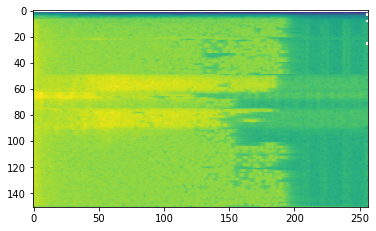

In [ ]:
spectrogram_test = np.load('/content/gdrive/MyDrive/Inzynierka/Data/output_spectrogram_test/common_voice_en_21878660.mp3.npy' , allow_pickle=True)
plt.figure()
plt.imshow(tf.math.log(spectrogram_test).numpy())